In [1]:
import pandas as pd
import numpy as np 
import random as rnd
import matplotlib.pyplot as plt
from scipy import stats

from greg_utils import GregUtils
gm=GregUtils()

# The Problem

A client has a long running part (consistently shown in blue) and a current run that appears to be below average.  He needs to know if he can make 500 parts in the next 24 hours (assuming 3 shifts, no down time)

## Step 1 Make some representative sample data:

In this case, we will assume that the average time per part is 5 minutes, and sigma is 0.5 minutes for the historical data, with 1,500 previous parts made.  The short run sample (current/recent production) has a mean of 5.45 with sigma = 0.5

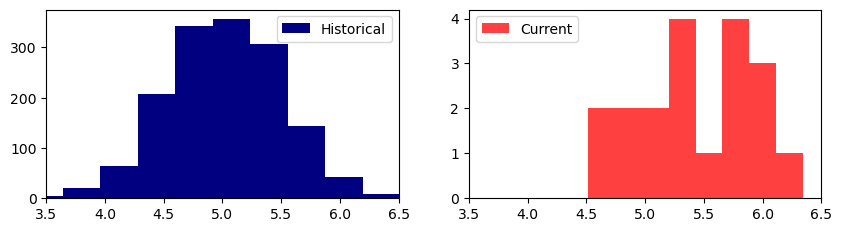

In [2]:
plt.subplots(2,1,figsize=(10,2.5),dpi=100)

plt.subplot(1,2,1)
mu=5
sigma=.5
long_run=np.random.normal(mu, sigma,1500)
plt.hist(long_run, color='navy', label="Historical")
x_lim=(mu-3*sigma,mu+3*sigma)
plt.xlim(x_lim)
plt.legend(loc='best')

plt.subplot(1,2,2)
mu=5.45
sigma=.5
short_run=np.random.normal(mu,sigma,20)
plt.hist(short_run, color='red', alpha=0.75,label="Current")
plt.xlim(x_lim)

plt.legend(loc='best')
plt.show()

## Step 2: Determine the probability that the means of the existing run and historical runs  will be the same.

Specifically we are assuming that the early sample run would be the same as a random sample from the completed run.  Though unlikely to be exactly true, it is the best approximation we have.  To do this, we use a two sided independent T-test (good for small distributions and robust to large distributions.)


In [3]:
p_value=stats.ttest_ind(short_run, long_run, axis=0, equal_var=True)[1]

print(f"P_value is approximately {p_value:0.8f}")


P_value is approximately 0.00001338


## Step 3: Determine which distribution mean to use, and calculate expected production

Assume 95% probability required for key customer.  If less, change target_p appropriately.


In [4]:
target_p = 0.05
hours = 24

if p_value < target_p:
    print(f"We can not assume that the difference in means is just random, and must assume that the mean of the")
    print(f"sample is representative of this run mean production time.  Assume that the next {hours} hours")
    print(f"will produce {60*hours/np.mean(short_run):.0f} parts")
    
else:
    print(f"The difference in means could be completely random, so we should assume that the mean of the")
    print(f"historical sample is representative of this run mean production time.  Assume that the next {hours} hours")
    print(f"will produce {60*hours/np.mean(long_run):.0f} parts")


We can not assume that the difference in means is just random, and must assume that the mean of the
sample is representative of this run mean production time.  Assume that the next 24 hours
will produce 262 parts


## Examples

With the thought process clear, lets show some test cases.  Note: gm is a convenience function for above code:

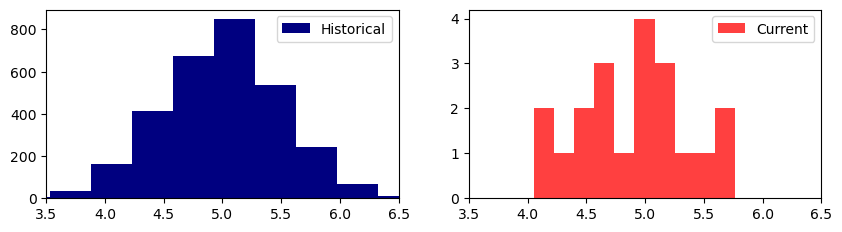


           History  Current Lot
# Samples   3000.0        20.00
Mean           5.0         4.89
Sdev           0.5         0.45

P_value is approximately 0.3496

We assume that the difference in means is just random, and must 
assume that the mean of the history is representative of this run's
eventual mean production time.  Assume that the next {self.hours} hours
will produce 288 parts


In [5]:
gm.show_test_case()

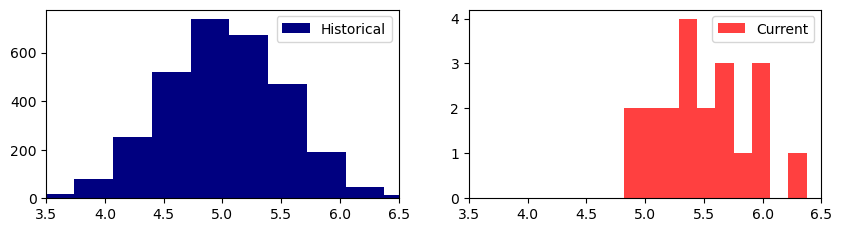


           History  Current Lot
# Samples  3000.00         20.0
Mean          5.01          5.5
Sdev          0.51          0.4

P_value is approximately 0.0000

We can not assume that the difference in means is just random, and must 
assume that the mean of the sample is representative of this run's mean
production time.  Assume that the next {self.hours} hours
will produce 262 parts


In [6]:
gm.show_test_case(sr_mu=5.25)

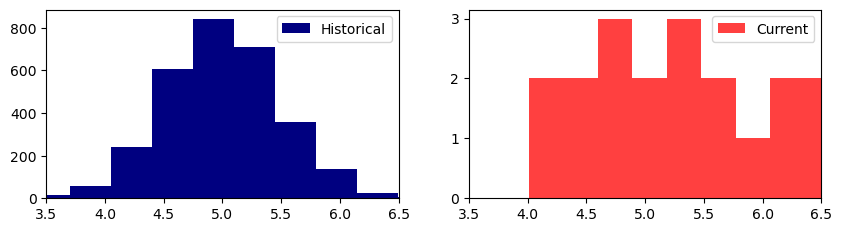


           History  Current Lot
# Samples  3000.00        20.00
Mean          5.00         5.34
Sdev          0.49         0.81

P_value is approximately 0.0018

We can not assume that the difference in means is just random, and must 
assume that the mean of the sample is representative of this run's mean
production time.  Assume that the next {self.hours} hours
will produce 270 parts


In [7]:
gm.show_test_case(sr_mu=5.25,sr_sig=.7)

## Sample Case 1: Relatively close means, sigma on current run is tight

3000 previous parts made


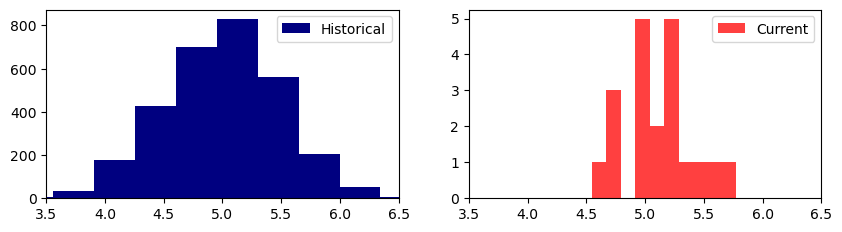


           History  Current Lot
# Samples  3000.00        20.00
Mean          5.00         5.11
Sdev          0.49         0.29

P_value is approximately 0.2927

We assume that the difference in means is just random, and must 
assume that the mean of the history is representative of this run's
eventual mean production time.  Assume that the next {self.hours} hours
will produce 288 parts


1000 previous parts made


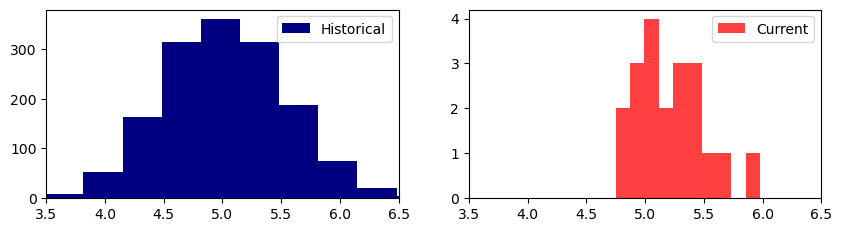


           History  Current Lot
# Samples  1500.00        20.00
Mean          5.02         5.22
Sdev          0.51         0.31

P_value is approximately 0.0836

We assume that the difference in means is just random, and must 
assume that the mean of the history is representative of this run's
eventual mean production time.  Assume that the next {self.hours} hours
will produce 287 parts


500 previous parts made


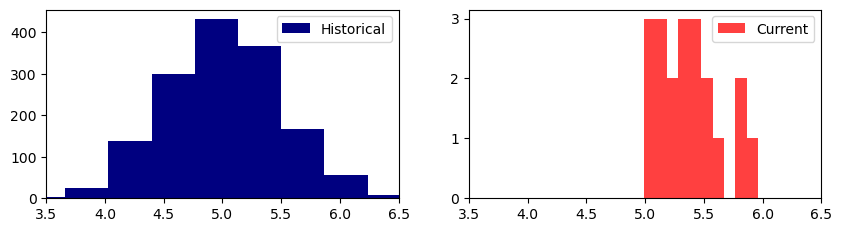


           History  Current Lot
# Samples  1500.00        20.00
Mean          5.01         5.37
Sdev          0.50         0.28

P_value is approximately 0.0014

We can not assume that the difference in means is just random, and must 
assume that the mean of the sample is representative of this run's mean
production time.  Assume that the next {self.hours} hours
will produce 268 parts


250 previous parts made


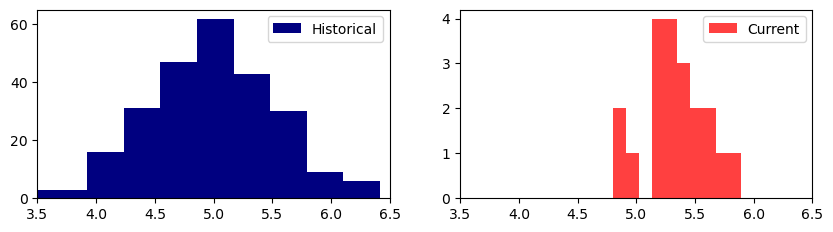


           History  Current Lot
# Samples   250.00        20.00
Mean          4.98         5.34
Sdev          0.54         0.28

P_value is approximately 0.0040

We can not assume that the difference in means is just random, and must 
assume that the mean of the sample is representative of this run's mean
production time.  Assume that the next {self.hours} hours
will produce 270 parts


In [8]:
## Now lets compare high and low amounts of history
print("3000 previous parts made")
gm.show_test_case(lr_num_sam=3000,sr_mu=5.25,sr_sig=.3)
print("\n\n1000 previous parts made")
gm.show_test_case(lr_num_sam=1500,sr_mu=5.25,sr_sig=.3)
print("\n\n500 previous parts made")
gm.show_test_case(lr_num_sam=1500,sr_mu=5.25,sr_sig=.3)
print("\n\n250 previous parts made")
gm.show_test_case(lr_num_sam=250,sr_mu=5.25,sr_sig=.3)



## Sample Case 2: Really close means, sigma on current run is wide

3000 previous parts made


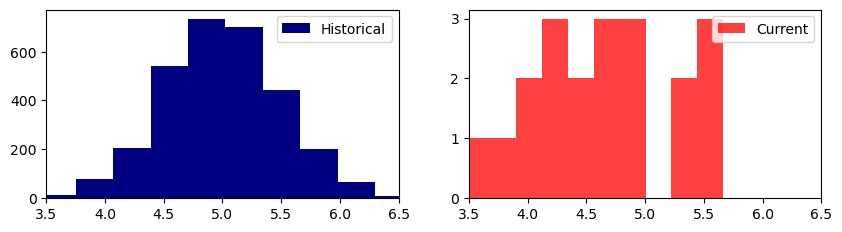


           History  Current Lot
# Samples  3000.00        20.00
Mean          5.00         4.63
Sdev          0.49         0.61

P_value is approximately 0.0007

We can not assume that the difference in means is just random, and must 
assume that the mean of the sample is representative of this run's mean
production time.  Assume that the next {self.hours} hours
will produce 311 parts


1000 previous parts made


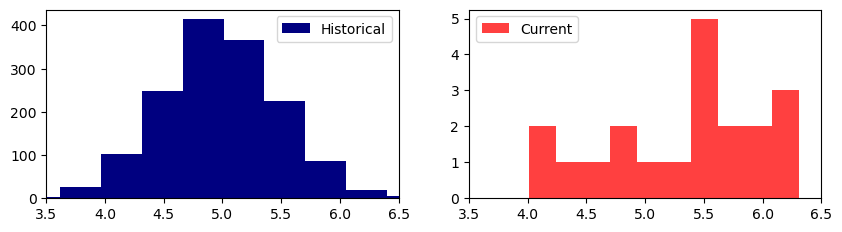


           History  Current Lot
# Samples  1500.00        20.00
Mean          4.99         5.34
Sdev          0.49         0.69

P_value is approximately 0.0014

We can not assume that the difference in means is just random, and must 
assume that the mean of the sample is representative of this run's mean
production time.  Assume that the next {self.hours} hours
will produce 269 parts


500 previous parts made


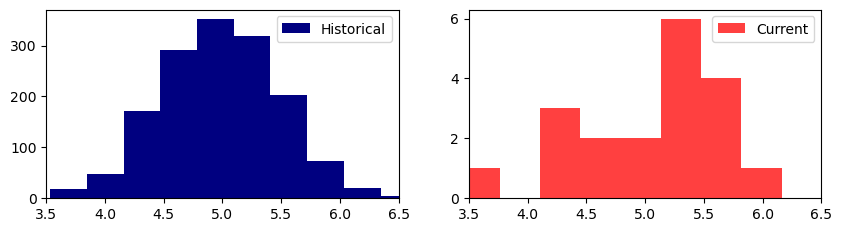


           History  Current Lot
# Samples  1500.00        20.00
Mean          4.98         5.11
Sdev          0.50         0.74

P_value is approximately 0.2352

We assume that the difference in means is just random, and must 
assume that the mean of the history is representative of this run's
eventual mean production time.  Assume that the next {self.hours} hours
will produce 289 parts


250 previous parts made


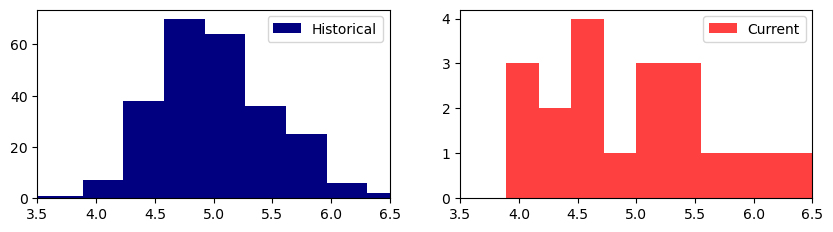


           History  Current Lot
# Samples   250.00        20.00
Mean          5.01         5.02
Sdev          0.50         0.75

P_value is approximately 0.9298

We assume that the difference in means is just random, and must 
assume that the mean of the history is representative of this run's
eventual mean production time.  Assume that the next {self.hours} hours
will produce 288 parts


In [9]:
## Now lets compare high and low amounts of history
print("3000 previous parts made")
gm.show_test_case(lr_num_sam=3000,sr_mu=5.1,sr_sig=.8)
print("\n\n1000 previous parts made")
gm.show_test_case(lr_num_sam=1500,sr_mu=5.1,sr_sig=.8)
print("\n\n500 previous parts made")
gm.show_test_case(lr_num_sam=1500,sr_mu=5.1,sr_sig=.8)
print("\n\n250 previous parts made")
gm.show_test_case(lr_num_sam=250,sr_mu=5.1,sr_sig=.8)